In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from scipy import stats

In [2]:
# Step 2: Load Dataset
df = pd.read_csv("/content/heart.csv")  # Change path if needed

In [3]:
df.dropna(inplace=True)
print(" Missing values dropped. Shape:", df.shape)

 Missing values dropped. Shape: (1025, 14)


In [4]:
# Step 4: Normalization/Scaling (Standardize numeric features)
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [5]:
# Step 5: One-hot encode only if columns exist
multi_class = ['cp', 'restecg', 'slope', 'thal']
available_cols = [col for col in multi_class if col in df.columns]

print(" Columns available for encoding:", available_cols)

if available_cols:
    df = pd.get_dummies(df, columns=available_cols, drop_first=True)
else:
    print(" No categorical columns found to encode.")


 Columns available for encoding: ['cp', 'restecg', 'slope', 'thal']


In [6]:
# Step 6: Outlier Removal (Z-score threshold = 2.5)
df = df[(np.abs(stats.zscore(df[numeric_cols])) < 2.5).all(axis=1)]

In [9]:
# Step 7: Feature Selection (Top 10 best features based on f_classif)
X_all = df.drop('target', axis=1)
y_all = df['target']
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_all, y_all)

# Define selected_cols here before it's used
selected_cols = X_all.columns[selector.get_support()]

print(" Selected top 10 features:", list(selected_cols))

 Selected top 10 features: ['sex', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_2', 'slope_1', 'slope_2', 'thal_2', 'thal_3']


In [11]:
X = pd.DataFrame(X_selected, columns=selected_cols)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_all, test_size=0.2, stratify=y_all, random_state=42
)

In [13]:
#Clustering Methodology
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
from sklearn.model_selection import train_test_split

y = df['target']

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (765, 10)
Testing shape: (192, 10)


In [15]:
# Step 6: Outlier Removal (Z-score threshold = 2.5)
df = df[(np.abs(stats.zscore(df[numeric_cols])) < 2.5).all(axis=1)]


In [16]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)


In [17]:
import os
os.environ["OMP_NUM_THREADS"] = "4"

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


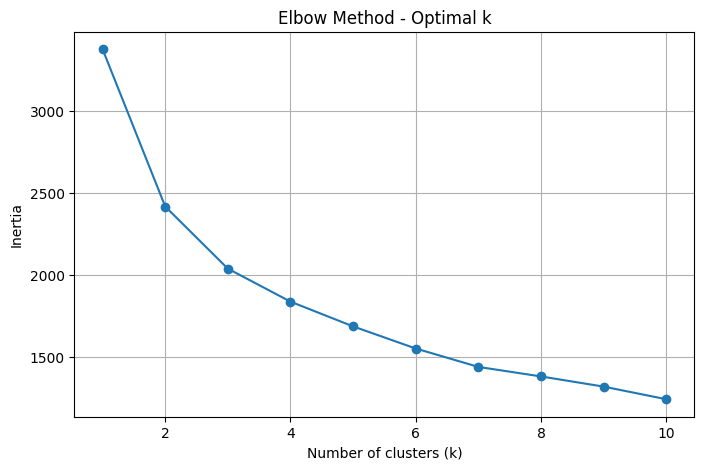

In [18]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


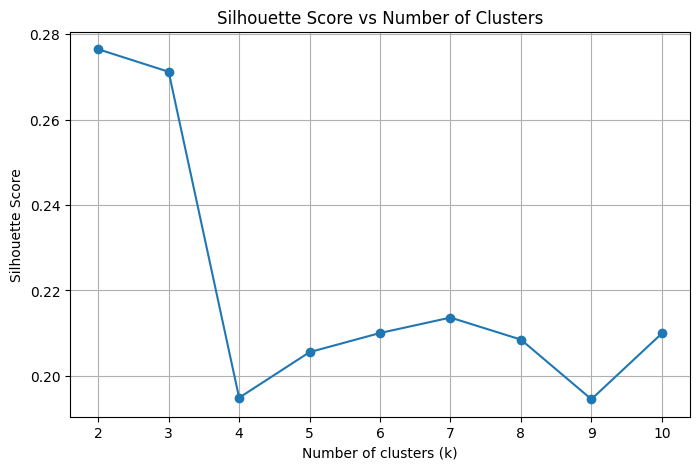

In [19]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # Silhouette not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


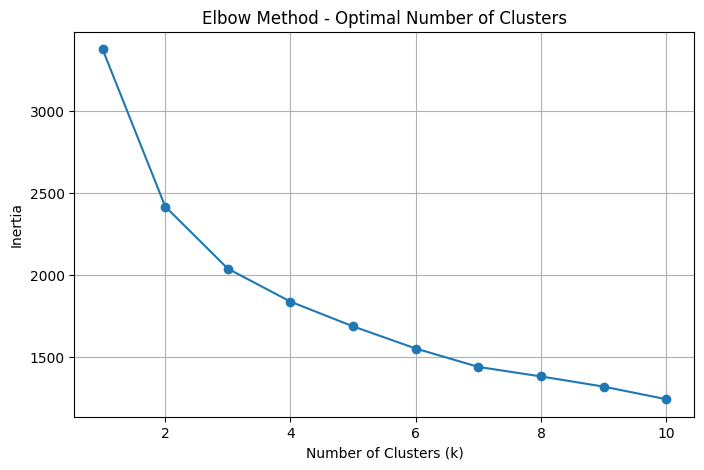

In [20]:
#Model Evaluation

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


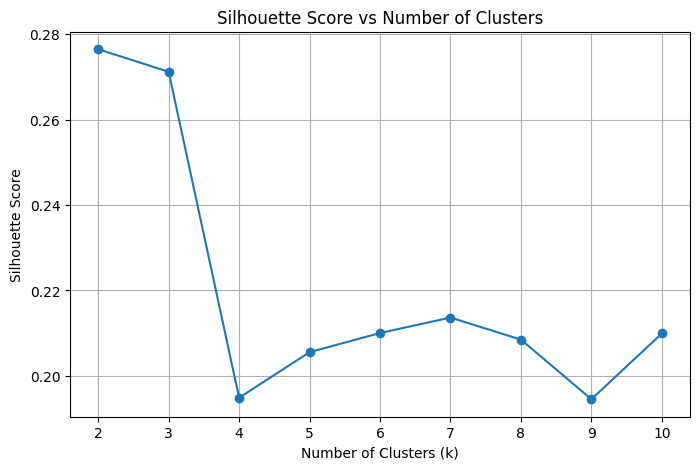

In [21]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # Must start from 2
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [22]:
# Final KMeans with 3 clusters
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_train)

# Assign cluster labels to PCA result for visualization
cluster_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
cluster_df['Cluster'] = cluster_labels


In [23]:
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [24]:
from sklearn.cluster import KMeans

kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_train)


In [25]:
# Assume X_pca already contains the PCA-reduced data from Step 3.1
cluster_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
cluster_df['Cluster'] = cluster_labels


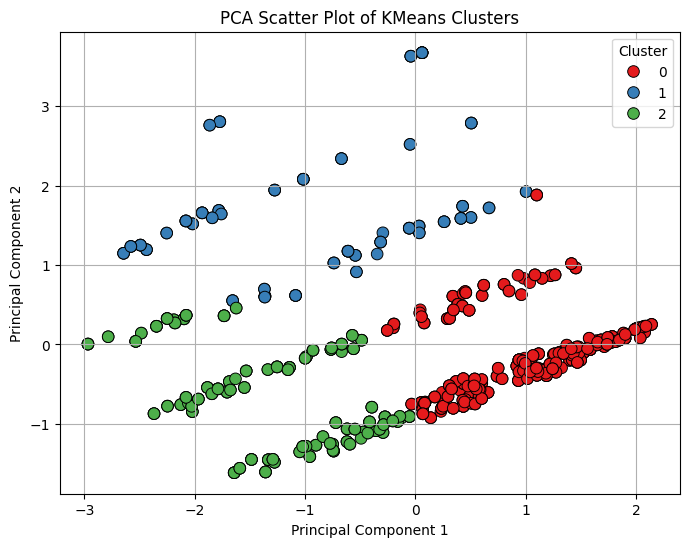

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=cluster_df,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Set1',
    s=70,
    edgecolor='k'
)

plt.title('PCA Scatter Plot of KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [27]:
#Boost Clustering with PCA
from sklearn.decomposition import PCA

# Reduce X_train while keeping 95% of variance
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

print("Original shape:", X_train.shape)
print("Reduced shape:", X_reduced.shape)


Original shape: (765, 10)
Reduced shape: (765, 7)


In [28]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use same best k (2), or test multiple k values again
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_reduced)

# Evaluate new silhouette score
score = silhouette_score(X_reduced, labels)
print("🔍 Silhouette Score after PCA:", round(score, 3))


🔍 Silhouette Score after PCA: 0.288


In [29]:
import joblib

# Save the StandardScaler model
joblib.dump(scaler, 'scaler.pkl')

# Save the PCA model
joblib.dump(pca, 'pca.pkl')

# Save the KMeans model (using the final KMeans model, not the one from the boosted clustering step)
joblib.dump(kmeans_final, 'kmeans_model.pkl')

print("✅ Clustering models saved: scaler.pkl, pca.pkl, kmeans_model.pkl")

✅ Clustering models saved: scaler.pkl, pca.pkl, kmeans_model.pkl
